# Generate Caravan Forcing

This notebook will give you all the details for getting CAMELS forcing from the Caravan dataset.

in eWaterCycle we provide access to the Caravan dataset, which contains all of the above data for all the catchments in the different Camels datasets. There is a known problem with the caravan evaporation data keep that in mind!


Using the interactive maps at [eWaterCycle caravan map](https://www.ewatercycle.org/caravan-map/) one can easily retrieve the identifier of the catchment.

What we will need for the Caravan forcing:
1. a camels id
2. time window for your experiment
3. a directory to save your data

We will start with one of the bigger catchments of the GB-CAMELS dataset.
After we import the modules.

In [1]:
# General python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Niceties
from rich import print

# General eWaterCycle
import ewatercycle
import ewatercycle.forcing

In [2]:
camels_id = "camelsgb_33039"  # river: Bedford Ouse at Roxton, England

Now lets specify the start and end date:

In [3]:
experiment_start_date = "2000-08-01T00:00:00Z"
experiment_end_date = "2005-08-31T00:00:00Z"

Note that these are in hydrological years!

Now we need to specify a path to the directory where we want to save the data.
We recommend that you use one folder to save all your data.

In [4]:
forcing_path_caravan = Path.home() / "forcing" / camels_id / "caravan"
forcing_path_caravan.mkdir(exist_ok=True, parents=True)

Now we have everything we need to generate the Caravan forcing object:

In [5]:
camels_forcing = ewatercycle.forcing.sources['CaravanForcing'].generate(
    start_time=experiment_start_date,
    end_time=experiment_end_date,
    directory=forcing_path_caravan,
    basin_id=camels_id,
)

Now let us print it to see what it contains:

In [6]:
print(camels_forcing)

CaravanForcing(
    start_time='2000-08-01T00:00:00Z',
    end_time='2005-08-31T00:00:00Z',
    directory=PosixPath('/home/mmelotto/forcing/camelsgb_33039/caravan'),
    shape=PosixPath('/home/mmelotto/forcing/camelsgb_33039/caravan/camelsgb_33039.shp'),
    filenames={
        'Q': 'camelsgb_33039_2000-08-01_2005-08-31_Q.nc',
        'tas': 'camelsgb_33039_2000-08-01_2005-08-31_tas.nc',
        'pr': 'camelsgb_33039_2000-08-01_2005-08-31_pr.nc',
        'tasmin': 'camelsgb_33039_2000-08-01_2005-08-31_tasmin.nc',
        'evspsblpot': 'camelsgb_33039_2000-08-01_2005-08-31_evspsblpot.nc',
        'tasmax': 'camelsgb_33039_2000-08-01_2005-08-31_tasmax.nc'
    }
)

It contains everything we gave it with also the shapefile of the camels catchment.
It contains the (daily) forcing data for:
1. Q: the discharge
2. tas: the temperature
3. pr: precipitation
4. tasmin: the minimum temperature for the day
5. evspsblpot: The potential evaporation
6. tasmax: maximum temperature for the day

Now if we want to load the data we run the following:

In [8]:
camels_forcing = ewatercycle.forcing.sources['CaravanForcing'].load(directory=forcing_path_caravan)

print(camels_forcing)

CaravanForcing(
    start_time='2000-08-01T00:00:00Z',
    end_time='2005-08-31T00:00:00Z',
    directory=PosixPath('/home/mmelotto/forcing/camelsgb_33039/caravan'),
    shape=PosixPath('/home/mmelotto/forcing/camelsgb_33039/caravan/camelsgb_33039.shp'),
    filenames={
        'Q': 'camelsgb_33039_2000-08-01_2005-08-31_Q.nc',
        'tas': 'camelsgb_33039_2000-08-01_2005-08-31_tas.nc',
        'pr': 'camelsgb_33039_2000-08-01_2005-08-31_pr.nc',
        'tasmin': 'camelsgb_33039_2000-08-01_2005-08-31_tasmin.nc',
        'evspsblpot': 'camelsgb_33039_2000-08-01_2005-08-31_evspsblpot.nc',
        'tasmax': 'camelsgb_33039_2000-08-01_2005-08-31_tasmax.nc'
    }
)

## The data

We can easily plot the data now!

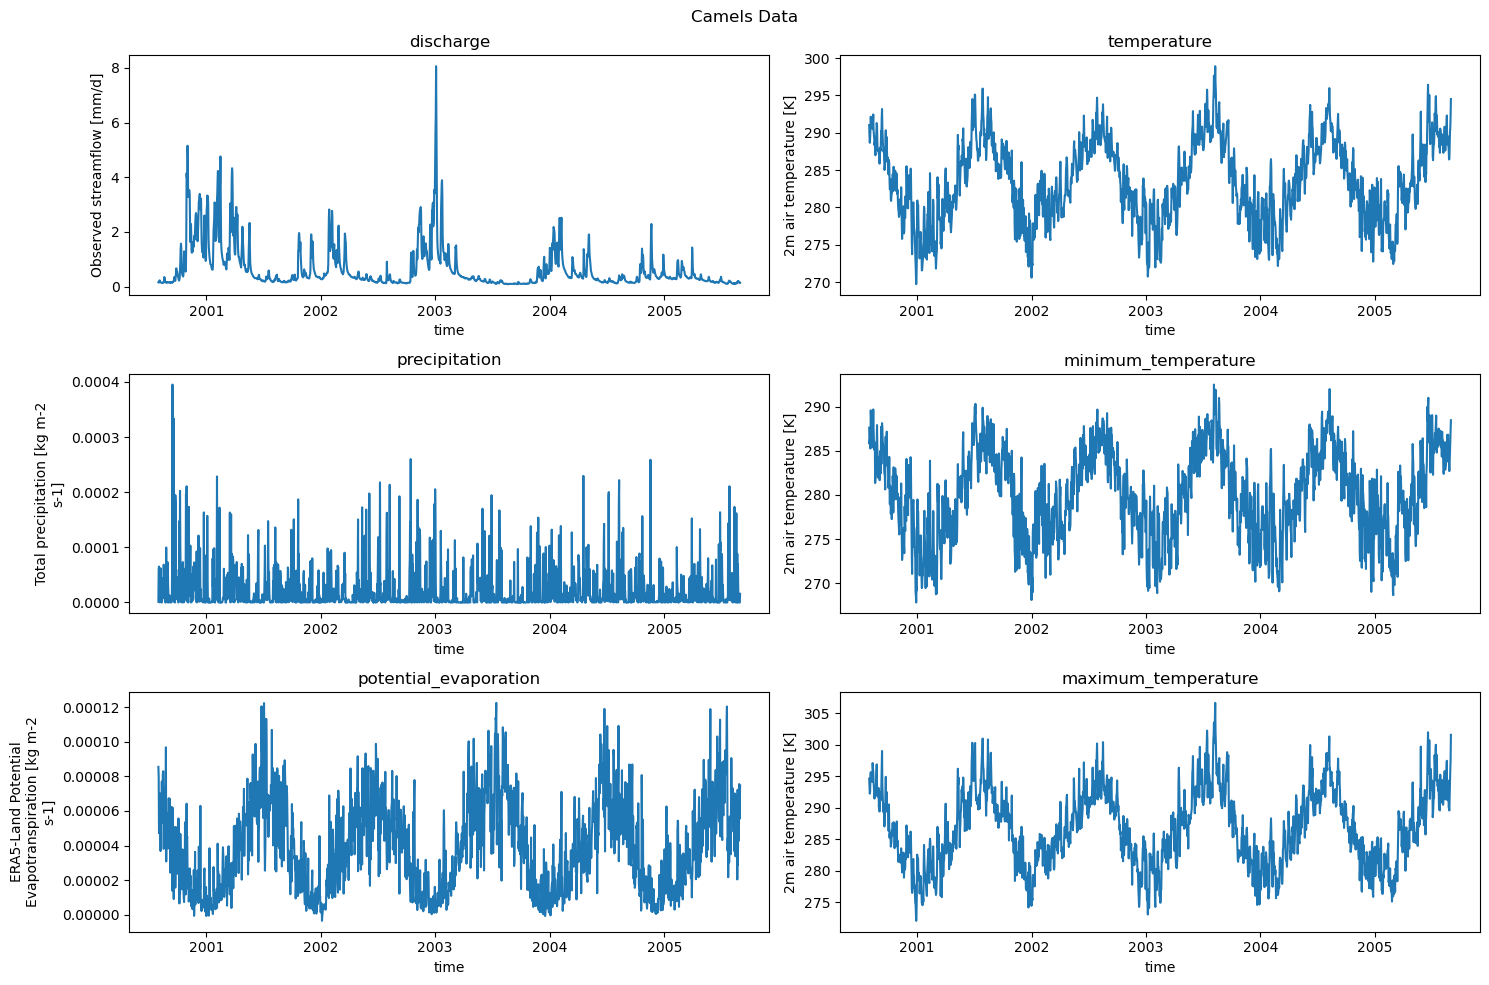

In [20]:
camels_data = { 'discharge Q': xr.open_dataset(camels_forcing['Q']),
                'temperature tas': xr.open_dataset(camels_forcing['tas']),
                'precipitation pr': xr.open_dataset(camels_forcing['pr']),
                'minimum_temperature tasmin': xr.open_dataset(camels_forcing['tasmin']),
                'potential_evaporation evspsblpot': xr.open_dataset(camels_forcing['evspsblpot']),
                'maximum_temperature tasmax': xr.open_dataset(camels_forcing['tasmax'])
}

plot_counter = 1
plt.figure(figsize=(15, 10))
for name, data in camels_data.items():
    plt.subplot(3,2, plot_counter)
    data[name.split(" ")[-1]].plot()
    plt.title(f"{name.split(" ")[0]}")
    plot_counter+=1

plt.suptitle("Camels Data")
plt.tight_layout()